# Calibrating the Liquid Drop Model

The purpose of this challenge is for you to calibrate the Liquid Drop Model https://en.wikipedia.org/wiki/Semi-empirical_mass_formula and compare the results of a "black box" calibration vs a principled Bayesian one.

Your task is to:

- Import the data from the AME 2016 table (included in the github). We are only using nuclei above A=16 to avoid light nuclei where the LDM fails particularly. Perform a curve fit using the built in functions from python (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) and take note of the reported uncertainties in the parameters. 
- Make a plot of the residuals and estimate the model error on its best fit. 
- Make a model calibration using the Bayesian formalism we defined and a Metropolis sampler. For the error, use your estimation from the previous point (the model error in this case is much smaller than the actual experimental uncertainties). 
- Plot the corner plot posterior as well as the model values on the Binding Energy per nucleon for the Calcium chain up to 60Ca including the available experimental data.
- What would be the results if you have used in the calibration the Binding Energy per nucleon instead of the total Binding Energy?
- Bonus: Find the experimental error in the masses and repeat the calibration using only experimental errors. This should give a good demonstration on the dangers of not taking into account model errors. 


In [2]:
%pip install corner
import numpy as np
import corner
import matplotlib.pyplot as plt
import scipy

#Some pretty colors I like
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

Note: you may need to restart the kernel to use updated packages.


In [5]:
def LDM(x, *params):
    #x = (n,z)
    #params= parameters (volume, surface, asymmetry, Coulomb)
    
    n=x[0]
    z=x[1]
    
    return params[0]*(n+z) - params[1]*(n+z)**(2/3) - params[2]*((n-z)**2/(n+z)) - params[3]*((z**2)/((n+z)**(1/3)))

- Import the data from the AME 2016 table (included in the github). We are only using nuclei above A=16 to avoid light nuclei where the LDM fails particularly. Perform a curve fit using the built in functions from python (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) and take note of the reported uncertainties in the parameters. 


In [6]:
from scipy.optimize import curve_fit
data = np.loadtxt('Masses2016.txt', skiprows=1)

xdata = np.array([data[:,0], data[:,1]])
ydata = np.array(data[:,2])
p0 = np.array([1,1,1,1])
ans, cov = curve_fit(LDM, xdata, ydata, p0=p0)
ans


array([10.4618677 , 14.24325763,  5.40685517,  0.49088531])

Make a plot of the residuals and estimate the model error on its best fit. 

ValueError: x and y must be the same size

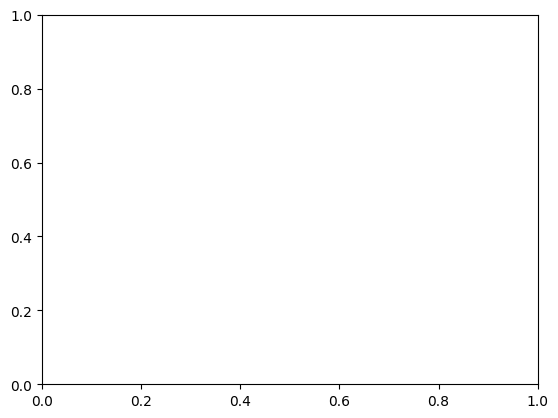

In [7]:
yNew = LDM(xdata, *ans)
residuals = ydata - yNew

plt.scatter(xdata, ydata, c=residuals)
plt.legend()
plt.show()